2

A

In [156]:
library(lmtest)
library(wooldridge)
library(stargazer)
library(tseries)
library(car)

In [157]:
data('hprice1')
df<-hprice1
fit1<-lm(price~lotsize+sqrft+bdrms, data=df)
fit2<-lm(lprice~lotsize+sqrft+bdrms, data=df)

In [158]:
bptest(fit1)
bptest(fit2)


	studentized Breusch-Pagan test

data:  fit1
BP = 14.092, df = 3, p-value = 0.002782



	studentized Breusch-Pagan test

data:  fit2
BP = 3.5427, df = 3, p-value = 0.3153


ya que el pvalue del fit1 es menor a 0.05 tenemos suficiente evidencia para afirmar que existe hetereoceasticidad utilizando el test de Breusch-Pagan.

In [159]:
bptest(fit1, ~lotsize*sqrft+lotsize*bdrms+sqrft*bdrms+I(lotsize^2)+I(sqrft^2)+I(bdrms^2), data=df)
bptest(fit2, ~lotsize*sqrft+lotsize*bdrms+sqrft*bdrms+I(lotsize^2)+I(sqrft^2)+I(bdrms^2), data=df)


	studentized Breusch-Pagan test

data:  fit1
BP = 33.732, df = 9, p-value = 9.953e-05



	studentized Breusch-Pagan test

data:  fit2
BP = 7.1926, df = 9, p-value = 0.6171


ya que el pvalue del fit1 es menor a 0.05 tenemos suficiente evidencia para afirmar que existe hetereoceasticidad utilizando el test de white.

B

La varianza de los $\beta$ ya no son mínimas, generado errores en el calculo de la matriz de Varianzas y covarianzas de los estimadores de mínimos cuadrados.
 Los estimadores MCO siguen siguiendo insesgados y consistentes.\
    1. Bajo heterocedasticidad, los errores estándar de los estimadores están sesgados\
    2. en presencia de heterocedasticidad los estadísticos habituales empleados en las pruebas de hipótesis bajo los supuestos de Gauss-Markov ya no son válidos.\
    3. Como $Var(u|X)$ ya no es constante, el estimador MCO ya no ya no es asintóticamente eficiente.

C

 Modelo general para la explicación

$ Y_i = \beta_1 + \beta_2 X_i + u_i $

Cuando la heterocedasticidad no es conocida, una forma de solucionarla es estimar el modelo por mínimos cuadrados generalizados, pero asumiendo ciertos supuestos.

1. Si por razones de especulación o por lo métodos gráficos se asume que la varianza del error es proporcional a $X_i^2$, se puede transformar el modelo original dividiéndolo entre $ X_i $, de allí se obtiene un $v_i $ que representa el término de perturbación transformado, igual a $\frac{u_i}{x_i} $ , ahora se puede verificar que:
$ E ( v_i ^2) = E \left ( \frac{u_i}{X_i} \right)^2 = \frac{1}{X^2_i} E ( u_i ^2) = \sigma^2 $
Por lo tanto la varianza de $v_i$ es ahora homoscedástica y se puede aplicar MCO a la ecuación transformada.

2. Si se asume que la varianza de $u_i$ es proporcional a la misma $X_i$ , entonces el modelo original se transforma dividiéndolo entre $ \sqrt{X_i}$, donde $v_i = \frac{u_i}{\sqrt{X_i}}$  y donde $ X_i > 0$,   con este supuesto se puede verificar que   $ E(u_i) = \sigma ^2 $ ,una situación homoscedástica que se puede estimar por MCO

3. Se asume que la varianza de $ u_i $ es proporcional al cuadrado del valor esperado de $Y_i$, ahora el modelo original se puede transformar dividiéndolo entre $ E(Y_i) $, donde $v_i = \frac{u_i} {E(Y_i)}$, aquí $ E ( v_i^2) = \sigma^2$, es decir que las perturbaciones $ v_i $ son homoscedásticas, en este caso es la regresión de la ecuación transformada la que satisfacerá el supuesto de homoscedasticidad del modelo clásico de regresión lineal.
Sin embargo, la transformación no funciona ya que $ E(Y_i)$ depende de los betas del modelo, que son desconocidos. Por esta razón el proceso de estimación se debe realizar en dos etapas: primero, se debe efectuar la regresión MCO usual sin considerar el problema de heteroscedasticidad, obteniendo $\hat{Y_i}$, luego transformamos en modelo dividiéndolo entre el $\hat{Y_i}$, donde $v_i = (\frac{u_i}{\hat{Y_i}})$, en este paso se efectúa la regresión. Aunque $\hat{Y_i}$, no es exactamente igual a $E (Y_i)$ estos estimadores son consistentes; es decir, a medida que el tamaño de la muestra aumenta indefinidamente, éstos convergen hacia el verdadero $E(Y:_i)$. Por tanto, la transformación del modelo original tendrá un desempeño adecuado en la práctica si el tamaño de la muestra es razonablemente grande.

4. aplicar una transformación logorítmica con frecuencia reduce la heteroscedasticidad comparada con el modelo original. Este resultado surge porque la transformación logarítmica comprime las escalas en las cuales se miden las variables, y por tanto reduce una diferencia entre dos valores de diez veces a una diferencia de dos veces.

D

Cuando la heterocedasticidad es desconocida, el estimador MCO cumple algunas propiedades deseables: es lineal, insesgado y consistente. El problema surge porque el estimador es ineficiente y, en consecuencia, los estadísticos t y F estarán sesgados. White demostró que la matriz de varianzas y covarianzas

$ Var ( \beta) = ( X'X)^{-1} X'  \sigma ^2_u \Omega X ( XX)^{-1}$

Puede estimarse consistentemente reemplazando la matriz desconocida $\Omega$ por una matriz diagonal que contiene los residuos al cuadrado de la estimación MCO, $\hat{\Omega} = diag (\hat{u_i^2}, ..... ,\hat{u_n^2} )$

6

In [160]:
data("wage1")
df<-wage1
fit1<-lm(wage~educ+exper+tenure, data=df)
fit2<-lm(lwage~educ+exper+tenure, data=df)
fit3<-lm(wage~educ+exper+tenure+I(educ^2)+I(exper^2)+I(tenure^2), data=df)
fit4<-lm(lwage~educ+exper+tenure+I(educ^2)+I(exper^2)+I(tenure^2), data=df)

In [161]:
stargazer(fit1,type="text")
stargazer(fit2,type="text")
stargazer(fit3,type="text")
stargazer(fit4,type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.599***          
                              (0.051)          
                                               
exper                         0.022*           
                              (0.012)          
                                               
tenure                       0.169***          
                              (0.022)          
                                               
Constant                     -2.873***         
                              (0.729)          
                                               
-----------------------------------------------
Observations                    526            
R2                             0.306           
Adjusted R2                    0.302           
Residual Std. Error      3.084 (df = 52

B

Interpretaciones de los coeficiente del modelo 3

1. $ \beta_1$ El salario promedio de un trabajador sin nivel educativo y sin experiencia laboral es 2,438
2. $ \beta_2$ por cada año que disminuya el nivel educativo el salario disminuye en promedio 0,499
3. $\beta_3$ Por cada año que aumente la experiencia el salario aumentará en promedio 0,199
4. $\beta_4$ Por cada año que permanezca el individuo en el empleo actual, el salario aumentará en promedio 0,230
5. $\beta_5$ Existirá un punto tal, en el que por cada año que aumenté el nivel educativo del individuo su salario en promedio aumentará 0,045
6. $\beta_6$ Existirá un punto tal, en el que por cada año que aumente la experiencia el salario  disminuirá en  0,004
7. $\beta_7$ Existirá un punto tal, en el cual por cada año que el individuo permanezca en su lugar actual de trabajo, su salario disminuirá en 0,003

Interpretaciones de los coeficiente del modelo 4

1. $\beta_1$si el individuo no cuenta con un nivel educativo, ni con experiencia laboral, el salario promedio que podría recibir es 0,959
2. $\beta_2$ si el nivel educativo disminuye un año el salario en promedio disminuye en  5,2%
3. $ \beta_3$ Por cada año que aumente la experiencia se estima que en promedio el salario aumente 3,1% 
4. $\beta_4$ Por cada año que el individuo permanezca en su trabajo actual, se estima que en promedio el salario aumente 3,5%
5. $\beta_5$ Existirá un punto tal, en el que por cada año que aumenté el nivel educativo del individuo su salario en promedio aumentará 0,6%
6. $ \beta_6$ Existirá un punto tal, en el que por cada año que aumente la experiencia el salario  disminuirá en  0,1%
7. $ \beta_7$ Existirá un punto tal, en el cual por cada año que el individuo permanezca en su lugar actual de trabajo, su salario disminuirá en 0,1%

C

In [162]:
bptest(fit1)
bptest(fit2)
bptest(fit3)
bptest(fit4)


	studentized Breusch-Pagan test

data:  fit1
BP = 43.096, df = 3, p-value = 2.349e-09



	studentized Breusch-Pagan test

data:  fit2
BP = 10.761, df = 3, p-value = 0.01309



	studentized Breusch-Pagan test

data:  fit3
BP = 58.842, df = 6, p-value = 7.732e-11



	studentized Breusch-Pagan test

data:  fit4
BP = 19.055, df = 6, p-value = 0.004072


los cuatro modelos rompen el supuesto de homoceasticidad.

In [163]:
jarque.bera.test(residuals(fit1))
jarque.bera.test(residuals(fit2))
jarque.bera.test(residuals(fit3))
jarque.bera.test(residuals(fit4))


	Jarque Bera Test

data:  residuals(fit1)
X-squared = 650.81, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  residuals(fit2)
X-squared = 20.941, df = 2, p-value = 2.836e-05



	Jarque Bera Test

data:  residuals(fit3)
X-squared = 582.13, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  residuals(fit4)
X-squared = 30.321, df = 2, p-value = 2.605e-07


los cuatro modelos rompen el supuesto de normalidad.

In [164]:
vif(fit1)
vif(fit2)
vif(fit3)
vif(fit4)

educ    exper   tenure 
1.112771 1.477618 1.349296

educ    exper   tenure 
1.112771 1.477618 1.349296

educ       exper      tenure   I(educ^2)  I(exper^2) I(tenure^2) 
  22.303248   15.040272    7.985883   21.850133   14.461662    7.208616

educ       exper      tenure   I(educ^2)  I(exper^2) I(tenure^2) 
  22.303248   15.040272    7.985883   21.850133   14.461662    7.208616

el modelo 3 y 4 rompen los supuestos de multicolinealidad.

D

In [165]:
resettest(fit1)
resettest(fit2)
resettest(fit3)
resettest(fit4)


	RESET test

data:  fit1
RESET = 11.566, df1 = 2, df2 = 520, p-value = 1.217e-05



	RESET test

data:  fit2
RESET = 6.5566, df1 = 2, df2 = 520, p-value = 0.001541



	RESET test

data:  fit3
RESET = 12.753, df1 = 2, df2 = 517, p-value = 3.925e-06



	RESET test

data:  fit4
RESET = 0.34542, df1 = 2, df2 = 517, p-value = 0.7081


el modelo con mejor especificacion es el fit4 ya que es el unico modelo con un pvalue superior a 0.05

8

In [166]:
colnames(df)

[1] "wage"     "educ"     "exper"    "tenure"   "nonwhite" "female"  
 [7] "married"  "numdep"   "smsa"     "northcen" "south"    "west"    
[13] "construc" "ndurman"  "trcommpu" "trade"    "services" "profserv"
[19] "profocc"  "clerocc"  "servocc"  "lwage"    "expersq"  "tenursq"

In [167]:
fit <- lm(lwage~female+nonwhite+married+educ+exper+tenure,data = df)

stargazer(fit,type = "text")


                        Dependent variable:    
                    ---------------------------
                               lwage           
-----------------------------------------------
female                       -0.286***         
                              (0.037)          
                                               
nonwhite                      -0.003           
                              (0.060)          
                                               
married                      0.126***          
                              (0.040)          
                                               
educ                         0.084***          
                              (0.007)          
                                               
exper                         0.003*           
                              (0.002)          
                                               
tenure                       0.017***          
                              (0.003)  

dado que el individuo es una mujer su salario disminuye en 28.6% respecto al salario de un hombre. este beta es significativo.\
dado que el individuo no es caucasico su salario disminuye en 0.3%. este beta no es significativo.\
dado que el indivuo es un hombre casado su salario va a a ser 41.2% mayor al de una mujer no casada. este beta es significativo.\
dado que el individuo es una mujer caucasica casada va a tener un salario igual que un hombre no caucasico no casado. este beta no es significativo.


Test de Jarque-Bera

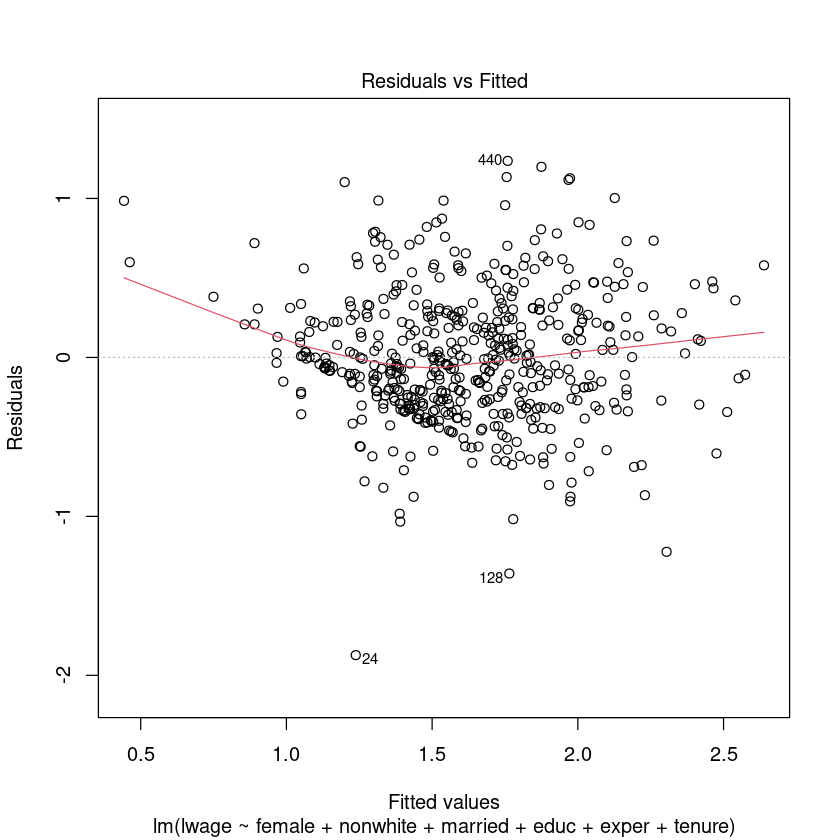

In [168]:
plot(fit,1)

In [169]:
jarque.bera.test(residuals(fit))


	Jarque Bera Test

data:  residuals(fit)
X-squared = 21.132, df = 2, p-value = 2.578e-05


ya que el pvalue es inferior a 0.05 y como se nota en la grafica de residuos, el modelo no dsitribuye de forma normal los residuos. por ende se puede consedirar que no se cumple elo supuesto de normalidad en el modelo.\
ya que no se cumple con la normalidad cualquier prueba de hipotesis puede fallar ademas que es completamente inutil el modelo para realizar una estimacion con intervalos de confianza.